# ML pipeline - PCA

In [1]:
import pandas as pd

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (13, 7)

1.  Charge le dataset et mène une analyse exploratoire : le nombre de 
features, les corrélations dans les données, les indicateurs statistiques (de position, de dispersion)...
2.  Crée un slice du dataset avec uniquement les colonnes numériques (tu peux utiliser la méthode .select_dtypes(include='number') pour t'aider). Tu nommeras ce slice : X. Ce slice X doit avoir 366 lignes et 22 colonnes. Crée un second slice avec uniquement la colonne OPINION. Tu nommeras ce slice y.
Utilise un scaler pour mettre à l'échelle tes données. Tu transformeras tes données avec ce scaler, et tu enregistreras les données mises à l'échelle dans `X_scaled, qui doit également avoir 366 lignes et 22 colonnes.
3.  Instancie un objet pca, et entraine-le sur tes données standardisées.
Combien de composantes principales expliquent au moins 70% de la variance ? Tu peux t'aider de l'attribut pca.explained_variance_ratio_. Et 80% ?
4.  Transforme tes données grâce à pca.fit_transform(X_scaled), et stocke le résultat dans X_pca. Affiche sur une nuage de points les 2 premières colonnes (celles qui expliquent le plus de variance). Mets une couleur différente pour chaque OPINION. Tu devrais obtenir un graphique de ce type :

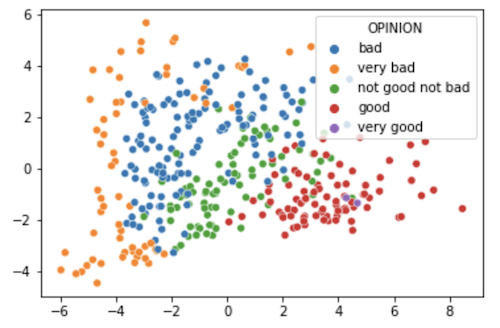

7.  Lance une classification KNN sur X_scaled et y. Quel est ton score ? Lance une autre classification KNN sur les deux premières colonnes de X_pca et y. Le score est-il très différent ?

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2020.csv")
data.head()

DATE  MAX_TEMPERATURE_C  MIN_TEMPERATURE_C  ...   OPINION  MONTH  DAY
0  2020-01-01                 11                 10  ...       bad      1    1
1  2020-01-02                 12                  9  ...       bad      1    2
2  2020-01-03                 12                 10  ...       bad      1    3
3  2020-01-04                  9                  5  ...  very bad      1    4
4  2020-01-05                  9                  4  ...  very bad      1    5

[5 rows x 24 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    366 non-null    object 
 1   MAX_TEMPERATURE_C       366 non-null    int64  
 2   MIN_TEMPERATURE_C       366 non-null    int64  
 3   WINDSPEED_MAX_KMH       366 non-null    int64  
 4   TEMPERATURE_MORNING_C   366 non-null    int64  
 5   TEMPERATURE_NOON_C      366 non-null    int64  
 6   TEMPERATURE_EVENING_C   366 non-null    int64  
 7   PRECIP_TOTAL_DAY_MM     366 non-null    float64
 8   HUMIDITY_MAX_PERCENT    366 non-null    int64  
 9   VISIBILITY_AVG_KM       366 non-null    float64
 10  PRESSURE_MAX_MB         366 non-null    int64  
 11  CLOUDCOVER_AVG_PERCENT  366 non-null    float64
 12  HEATINDEX_MAX_C         366 non-null    int64  
 13  DEWPOINT_MAX_C          366 non-null    int64  
 14  WINDTEMP_MAX_C          366 non-null    in

In [4]:
data.describe()

MAX_TEMPERATURE_C  MIN_TEMPERATURE_C  ...       MONTH         DAY
count         366.000000         366.000000  ...  366.000000  366.000000
mean           16.997268          11.259563  ...    6.513661   15.756831
std             6.369232           4.510670  ...    3.455958    8.823592
min             5.000000           0.000000  ...    1.000000    1.000000
25%            12.000000           8.000000  ...    4.000000    8.000000
50%            16.000000          11.000000  ...    7.000000   16.000000
75%            21.000000          15.000000  ...    9.750000   23.000000
max            38.000000          23.000000  ...   12.000000   31.000000

[8 rows x 22 columns]

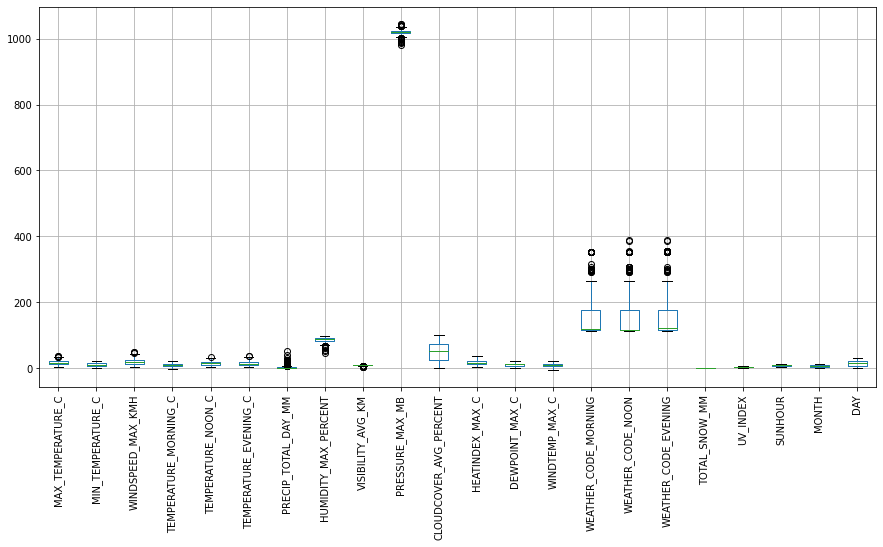

In [5]:
plt.subplots(figsize=(15,7))
data.boxplot()
plt.xticks(rotation=90)
plt.show()

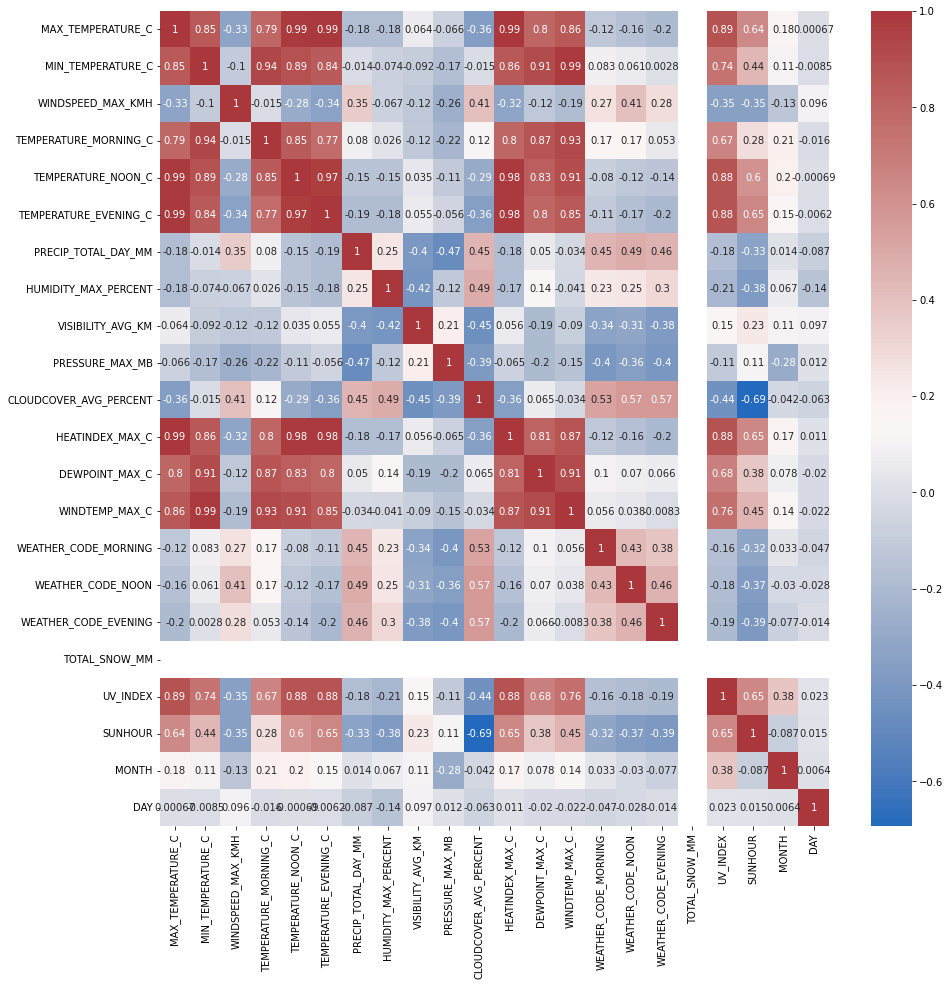

In [6]:
# correlation
plot_corr = data.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(plot_corr, annot=True, cmap="vlag")
plt.show()

In [7]:
# suppression de la colonne total snow n'ayant pas de valeur

df_net = data.drop(columns="TOTAL_SNOW_MM")

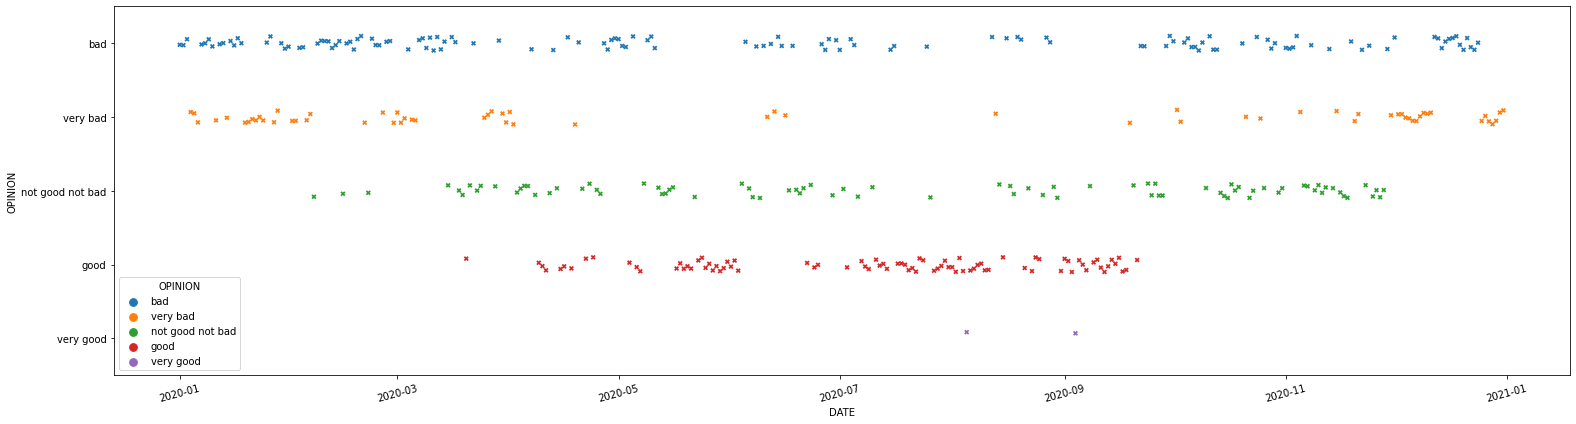

In [8]:
# Analyse dispersion opinion / dates

df_net["DATE"] = pd.to_datetime(df_net["DATE"])

# set size of figure
plt.figure(figsize=(22,6))
# use horizontal stripplot with x marker size of 5
sns.stripplot(y='OPINION', x='DATE', data=df_net, orient='h', marker='X', hue="OPINION", size=5)
# rotate x tick labels
plt.xticks(rotation=15)
# remover borders of plot
plt.tight_layout()
plt.show()

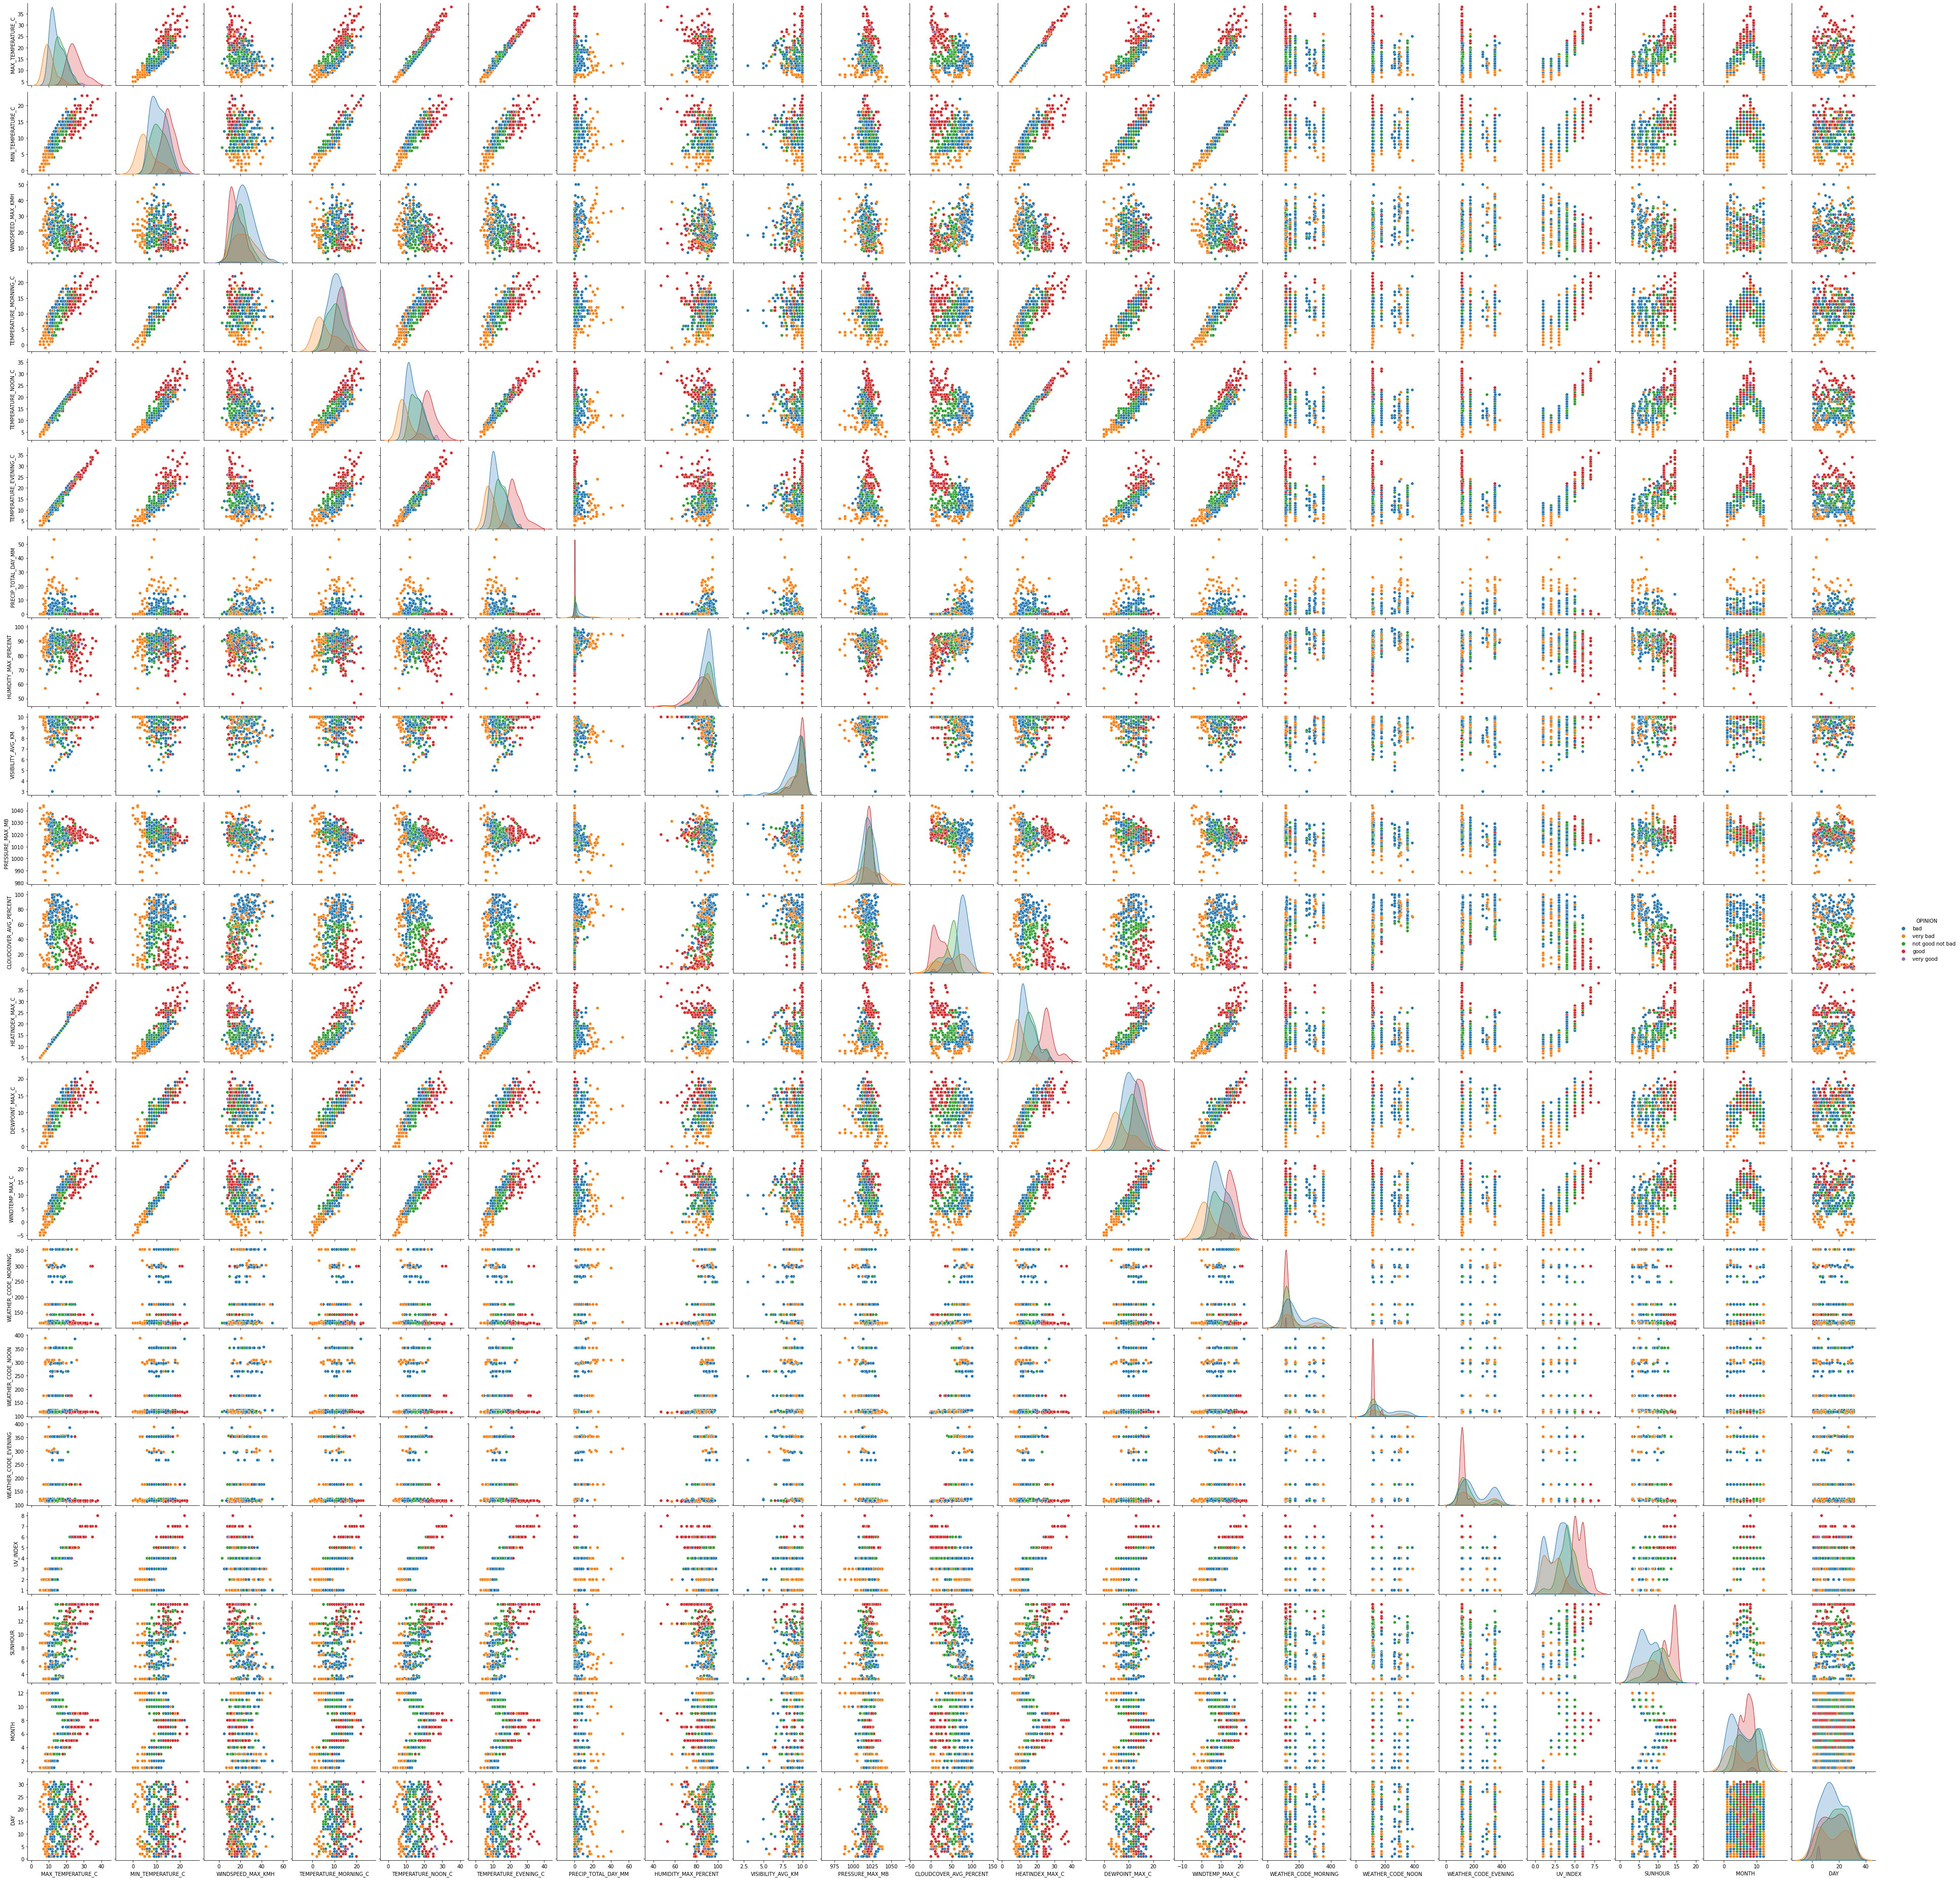

In [9]:
# pair plot global

sns.pairplot(df_net, hue='OPINION', height=2.5)
plt.show()

In [10]:
# X variables explicatives
X = df_net.select_dtypes(include="number")
# 21 colonnes snow dropped, pas de valeurs

# Target
y = df_net["OPINION"]

In [11]:
# fit scaler to X
scaler = StandardScaler()
scaler.fit(X)
# transform X
X_scaled = scaler.transform(X)
X_scaled.shape

(366, 21)

In [12]:
# PCA set up
# nombre de colonnes expliquant au moins 70% des variances
pca = PCA(n_components = 0.70)
pca.fit(X_scaled)

pca.explained_variance_ratio_

array([0.40997413, 0.20876414, 0.06448527, 0.05962773])

In [13]:
# PCA set up
# nombre de colonnes expliquant au moins 80% des variances
pca = PCA(n_components = 0.80)
pca.fit(X_scaled)

pca.explained_variance_ratio_

array([0.40997413, 0.20876414, 0.06448527, 0.05962773, 0.04577155,
       0.03909456])

In [14]:
# fit transform pca
X_pca = pca.fit_transform(X_scaled)
X_pca.shape

(366, 6)

In [15]:
# X_pca sous df
X_pca_df = pd.DataFrame(X_pca)
pca_df = pd.concat([X_pca_df, y], axis=1)
pca_df

0         1         2         3         4         5   OPINION
0   -2.979871  2.614537  2.885953 -1.093256  0.446893  0.422027       bad
1   -2.695837 -0.063532  2.264262 -1.269339  0.061472  1.704212       bad
2   -2.314025  0.033466  2.006965 -1.448710  0.073870  1.752541       bad
3   -3.367631 -3.240058  2.333096 -0.841262  0.777691  0.339900  very bad
4   -3.671390 -3.272882  1.977849 -0.946253  0.801887  0.366775  very bad
..        ...       ...       ...       ...       ...       ...       ...
361 -3.865098  3.527240 -2.561789  0.444999 -0.476753 -0.068809  very bad
362 -4.926436  2.679314 -3.909641  2.281753  0.109619 -1.233589  very bad
363 -4.154275  0.095522 -1.315933  2.640078 -0.741728 -2.212112  very bad
364 -4.438493 -1.484539 -0.881221  2.377764 -1.428553 -0.837347  very bad
365 -4.684806  1.482493 -1.431687  2.296441 -1.133371 -0.950427  very bad

[366 rows x 7 columns]

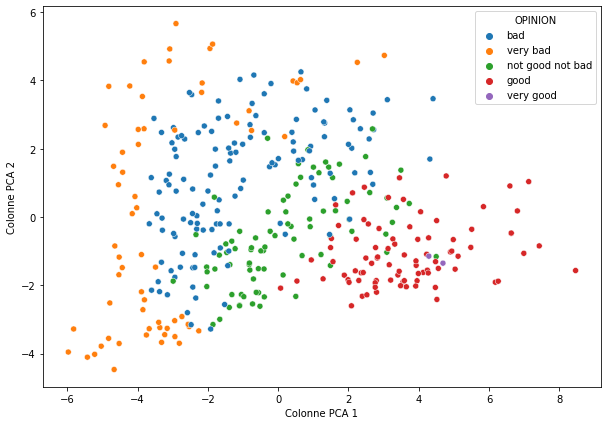

In [23]:
plt.subplots(figsize=(10,7))
sns.scatterplot(data=pca_df, x=0, y=1, hue="OPINION")
plt.xlabel("Colonne PCA 1")
plt.ylabel("Colonne PCA 2")
plt.show()

In [17]:
# Init / fit KNN model scaled
modelKNN_scaled = KNeighborsClassifier()
modelKNN_scaled.fit(X_scaled, y)

y_pred = modelKNN_scaled.predict(X_scaled)

# Score
print("\nKNN scaled accuracy score :",  round(accuracy_score(y, y_pred), 3))


KNN scaled accuracy score : 0.866


In [18]:
# 2 premières colonnes X_pca
X_pca = X_pca_df[[0, 1]]

# Init / fit KNN model pca
modelKNN_pca = KNeighborsClassifier()
modelKNN_pca.fit(X_pca, y)

y_pred = modelKNN_pca.predict(X_pca)

print("\nKNN pca accuracy score :",  round(accuracy_score(y, y_pred), 3))


KNN pca accuracy score : 0.847
